<h2 style="text-align: center;">Task Set 3</h2>
<h1 style="text-align: center;">Dependence of process intensity on the value of an accompanying variable</h1>


#### 1.  Wczytanie potrzebnych pakietów

In [1]:
library(spatstat)

Ładowanie wymaganego pakietu: spatstat.data

Ładowanie wymaganego pakietu: spatstat.univar

spatstat.univar 3.1-1

Ładowanie wymaganego pakietu: spatstat.geom

spatstat.geom 3.3-4

Ładowanie wymaganego pakietu: spatstat.random

spatstat.random 3.3-2

Ładowanie wymaganego pakietu: spatstat.explore

Ładowanie wymaganego pakietu: nlme

spatstat.explore 3.3-3

Ładowanie wymaganego pakietu: spatstat.model

Ładowanie wymaganego pakietu: rpart

spatstat.model 3.3-3

Ładowanie wymaganego pakietu: spatstat.linnet

spatstat.linnet 3.2-3


spatstat 3.3-0 
For an introduction to spatstat, type 'beginner' 




W analizach przestrzennych istotnym zagadnieniem jest wzajemne położenie różnych obiektów, np. złóż
złota lub obiektów liniowych (uskoków). Można np. zapytać jaka jest odległość obiektów punktowych od
najbliższego obiektu liniowego.

#### 2. Wyświetlenie mapy z uskokami
Wyświetl mapę rozmieszczenia złóż złota (z poprzednich zajęć). Nałóż na nią mapę występowania
uskoków. 


Obiekt `murchison` zawiera następujące dane geologiczne obszaru Murchison:
List of spatial objects

gold:
Planar point pattern: 255 points
window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres

faults:
planar line segment pattern: 3252 line segments
window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres

greenstone:
window: polygonal boundary
enclosing rectangle: [352782.9, 681699.6] x [6706467, 7100804] metres


Proces punktowy `gold` - lokalizacja złóż złota:
Planar point pattern: 255 points
window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres

Element `faults` - położenie uskoków:
planar line segment pattern: 3252 line segments
window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres


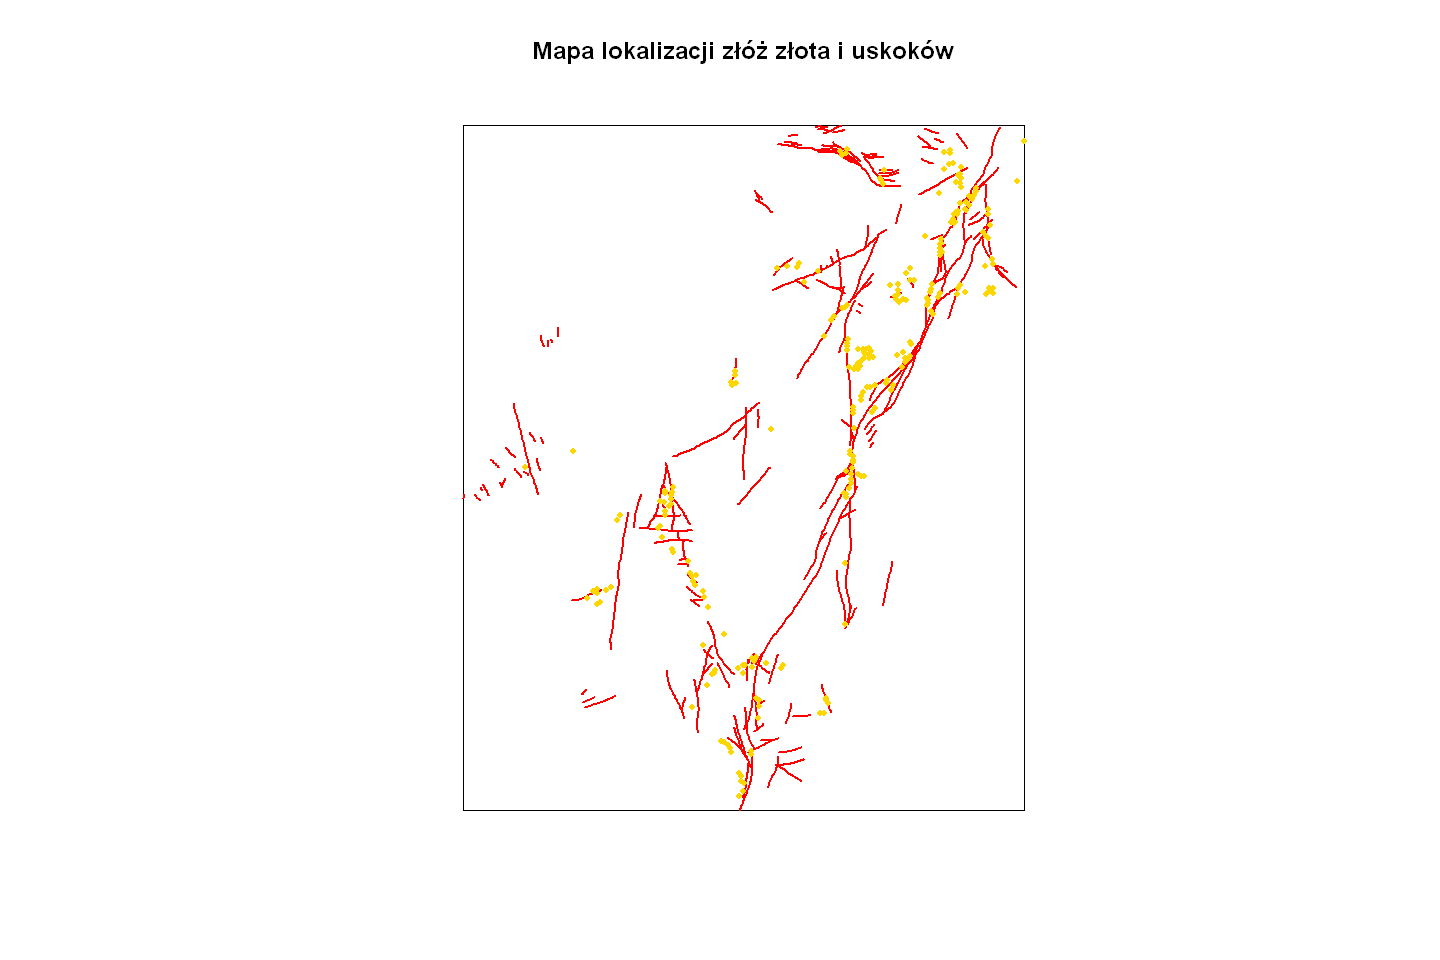

In [2]:
# Wczytanie danych
data(murchison)
cat("Obiekt `murchison` zawiera następujące dane geologiczne obszaru Murchison:\n")
print(murchison)

# Wydzielenie poszczególnych elementów obiektu
gold <- murchison$gold
faults <- murchison$faults

# Wyświetlenie informacji o złóż złota
cat("\n\nProces punktowy `gold` - lokalizacja złóż złota:\n")
print(gold)

# Wyświetlenie informacji o uskokach
cat("\nElement `faults` - położenie uskoków:\n")
print(faults)

options(repr.plot.width = 12, repr.plot.height = 8) # Ustawienie szerokości okna

# Wyświetl mapę rozmieszczenia złóż złota i nałóż na nią mapę występowania uskoków
plot(faults, main = "Mapa lokalizacji złóż złota i uskoków", col = "red", lwd = 2,
     xlab = "Współrzędna X", ylab = "Współrzędna Y")
plot(gold, add = TRUE, col = "gold", pch = 20)

#### 3. Mapa odległości od najbliższego uskoku
Analiza związku występowania złóż złota z siecią uskoków wymaga stworzenia mapy będącej
funkcją współrzędnej przestrzennej `u(x,y)`. Niech mapą tą będzie mapą `Z(u)` odległości dowolnego
punktu u od najbliższego uskoku.
Przekonwertuj informacje zawarte w mapie uskoków geologicznych `(L)` do zmiennej
stowarzyszonej `(covariate)`, która jest funkcją `Z(u)` lokalizacji przestrzennej `u`. 
$$
Z(u) = \text{distance from } u \text{ to } L
$$

Obliczenia te można wykonać używając komendy distmap, która zwraca obraz pikseli zawierający wartości
`Z(u)` w siatce pikseli `u`. 

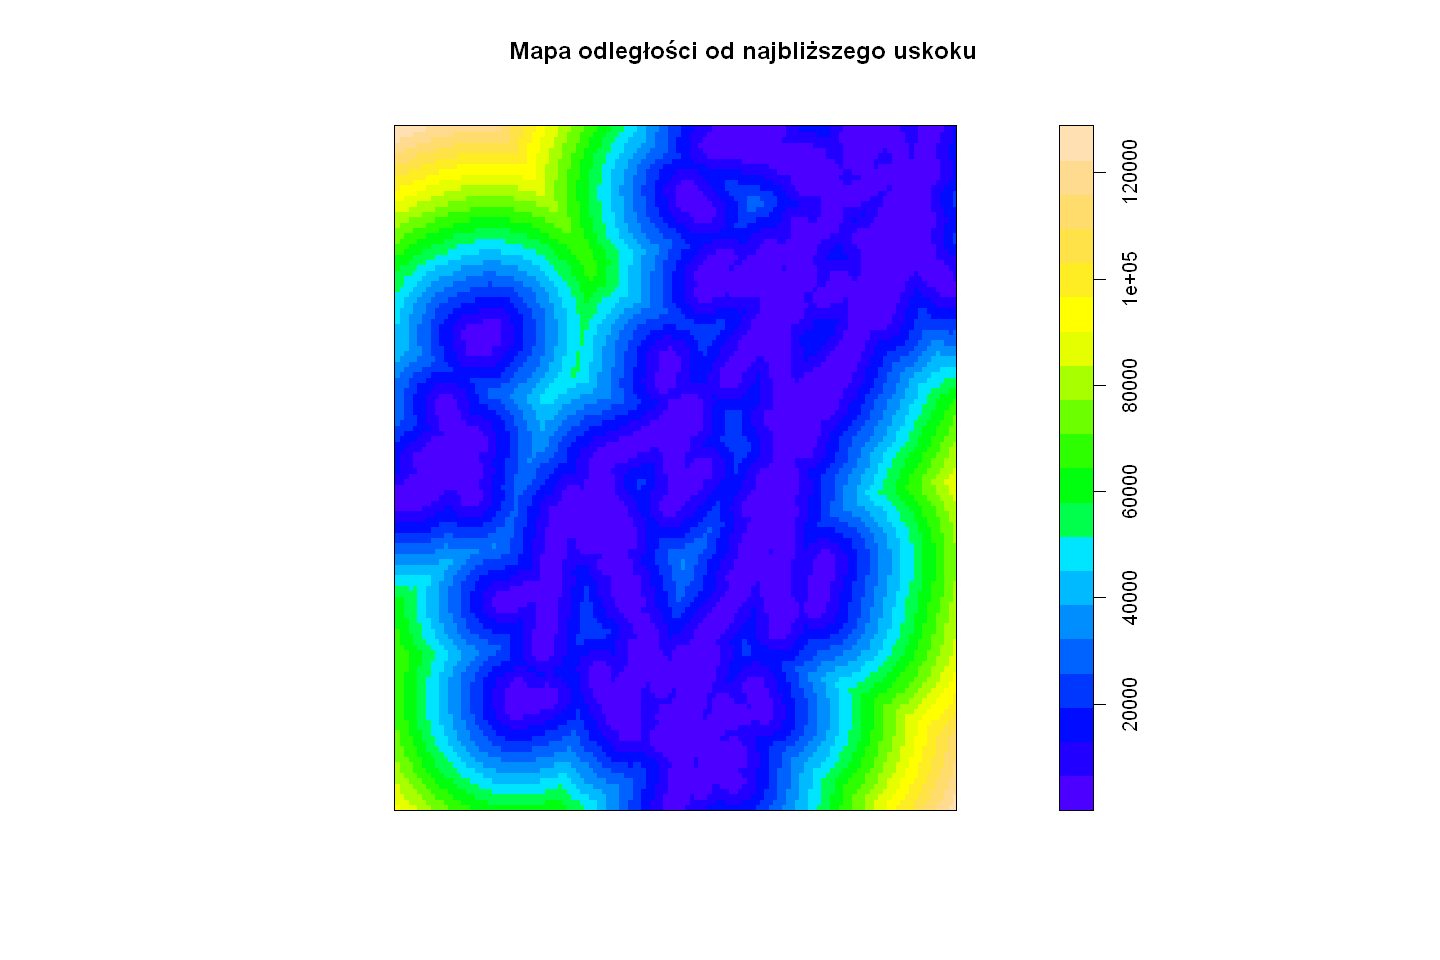

In [3]:
# Obliczanie mapy odległości od najbliższego uskoku
faults_distmap <- distmap(faults)

options(repr.plot.width = 12, repr.plot.height = 8) # Ustawienie szerokości okna

# Wizualizacja mapy odległości
plot(faults_distmap, main = "Mapa odległości od najbliższego uskoku", xlab = "Współrzędna X", 
     ylab = "Współrzędna Y", col = topo.colors(20))

#### 4. Nałożenie rozmieszczenia złóż złota na mapę odległości od najbliższego uskoku
Na mapę z ćwiczenia poprzedniego nałóż mapę rozmieszczenia złóż złota. Czy zauważasz jakąś zależność
pomiędzy lokalizacją złóż złota a odległością od uskoków? 

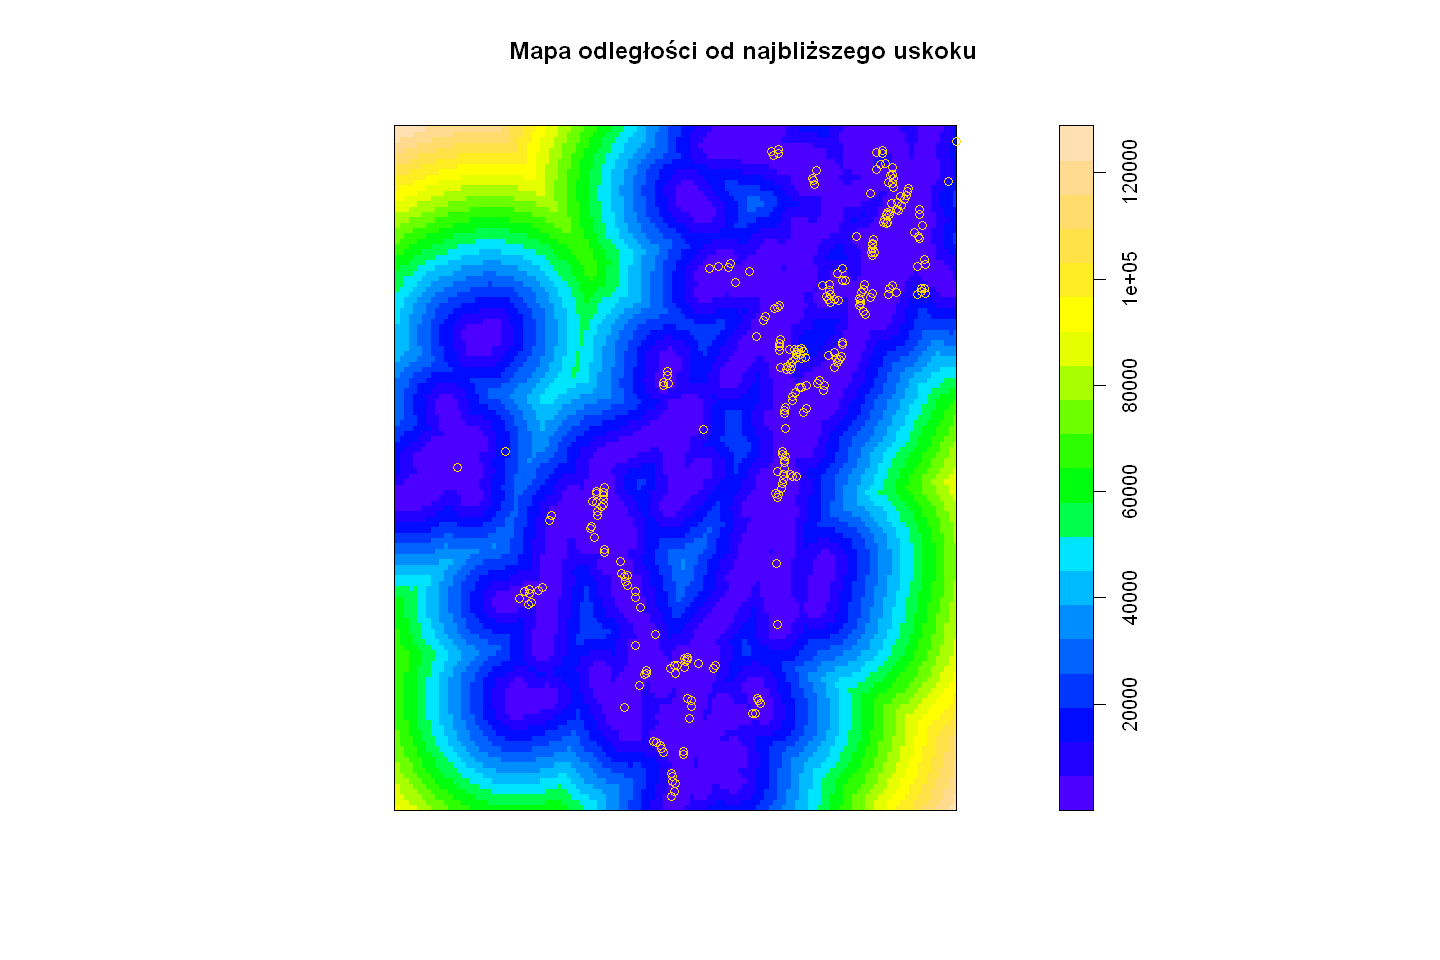

In [4]:
options(repr.plot.width = 12, repr.plot.height = 8) # Ustawienie szerokości okna

# Wizualizacja mapy odległości
plot(faults_distmap, main = "Mapa odległości od najbliższego uskoku", xlab = "Współrzędna X", 
     ylab = "Współrzędna Y", col = topo.colors(20))

# Nałożenie złóż złota
plot(gold, add = TRUE, col = "gold")

##### Analiza zależności:
Po nałożeniu mapy rozmieszczenia złóż złota na mapę odległości od uskoków, można wizualnie ocenić czy istnieje jakaś zależność pomiędzy lokalizacją złóż złota a odległością od uskoków.
W przypadku, gdy złoża złota znajdują się w pobliżu uskoków, może to sugerować, że obecność uskoków wpływa na lokalizację złóż złota, na przykład ze względu na warunki geologiczne sprzyjające mineralizacji.